In [1]:
% load_ext rpy2.ipython

In [2]:
%%R
#ip <- installed.packages() 
#pkgs.to.remove <- ip[!(ip[,"Priority"] %in% c("base", "recommended")), 1]
#sapply(pkgs.to.remove, remove.packages)

NULL


In [3]:
%%R
#source("http://bioconductor.org/biocLite.R")
#biocLite("phyloseq")

NULL


In [78]:
%%R
#install.packages("plotly")

/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: also installing the dependencies ‘viridisLite’, ‘base64enc’, ‘purrr’


  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: trying URL 'https://cran.mtu.edu/bin/macosx/mavericks/contrib/3.3/viridisLite_0.1.3.tgz'

  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning:  length 53960 bytes (52 KB)

  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWar

--- Please select a CRAN mirror for use in this session ---

The downloaded binary packages are in
	/var/folders/d2/qqsv2qxd5fjf4k455pzytwgh0000gn/T//RtmpLKnqKA/downloaded_packages


In [2]:
%%R
library("phyloseq")
library(ggplot2)
library("vegan")
library("dplyr")
library("plotly")

/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Use suppressPackageStartupMessages() to eliminate package startup
messages.

  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: permute

  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: lattice

  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: This is vegan 2.4-1

  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects 

In [3]:
%%R
physeq = import_biom("../../SeqData/otu_table.tax.meta.biom", "../../SeqData/trees/fulltree.tre", parseFunction = parse_taxonomy_greengenes)

Merge<-paste(as.character(sample_data(physeq)$Trtmt),as.character(sample_data(physeq)$Month),as.character(sample_data(physeq)$Cosm),sep="_")
sample_data(physeq)$Merge <- Merge
# Creating a new column in the phyloseq sample data called Merge,
# which contains a concatenated ID so all samples from the same mineral, month, and cosm
# will have the same ID (thus merging PCR and buffer replicates).

ps.merged = merge_samples(physeq, "Merge")
# Merging the phyloseq object by biological replicates

keep=c("Cosm","Month","Trtmt")
sd = sample_data(ps.merged)
sd = sd[,keep]
sd$Trtmt = substring(row.names(sd),1,1)
sd$Trtmt[sd$Trtmt=="B"]="Blank"
sd$Trtmt[sd$Trtmt=="F"]="Ferrihydrite"
sd$Trtmt[sd$Trtmt=="Q"]="Quartz"
sd$Trtmt[sd$Trtmt=="H"]="Heavy Fraction"
sd$Trtmt[sd$Trtmt=="S"]="Soil"
sd$Trtmt[sd$Trtmt=="K"]="Kaolinite"
sample_data(ps.merged) = sd
physeq = ps.merged

In [4]:
%%R
ps.b = subset_taxa(physeq,Kingdom=="Bacteria")
ps.b = subset_samples(ps.b,sample_sums(physeq)>3000)

In [5]:
%%R
physeq.noSmall<-subset_samples(physeq,sample_sums(physeq)>1500)

In [6]:
%%R
physeq.2.5.noSmall<-subset_samples(physeq.noSmall, Month==2.5)

In [7]:
%%R
physeq.2.5<-subset_samples(physeq, Month==2.5)

In [8]:
%%R
ps <- physeq.noSmall

In [9]:
%%R
# Normalizes the sample counts by the total - i.e., reporting what fraction of each sample each OTU makes up.
ps_snorm = transform_sample_counts(ps, function(x) x / sum(x))
sample_data(ps_snorm)$Sum = sample_sums(ps)

In [25]:
%%R
# Computing the Bray distance matrix and NMDS in parallel

ord.full = ordinate(ps_snorm, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=40)
# Consider trymax= and k=3

Run 0 stress 0.08807321 
Run 1 stress 0.08647242 
... New best solution
... Procrustes: rmse 0.0382505  max resid 0.2296929 
Run 2 stress 0.089873 
Run 3 stress 0.08817796 
Run 4 stress 0.08803442 
Run 5 stress 0.09784761 
Run 6 stress 0.08645295 
... New best solution
... Procrustes: rmse 0.001671091  max resid 0.007933585 
... Similar to previous best
Run 7 stress 0.08809234 
Run 8 stress 0.1015828 
Run 9 stress 0.08927675 
Run 10 stress 0.08645219 
... New best solution
... Procrustes: rmse 0.001690848  max resid 0.007479931 
... Similar to previous best
Run 11 stress 0.08670203 
... Procrustes: rmse 0.00754098  max resid 0.02880664 
Run 12 stress 0.08645278 
... Procrustes: rmse 0.002451666  max resid 0.008133315 
... Similar to previous best
Run 13 stress 0.08646051 
... Procrustes: rmse 0.001834288  max resid 0.00950151 
... Similar to previous best
Run 14 stress 0.08989963 
Run 15 stress 0.08990737 
Run 16 stress 0.08990324 
Run 17 stress 0.1015495 
Run 18 stress 0.08990472 
Run

In [87]:
%%R
#ggsave(filename="NMDS-16S-3month.jpg", plot=p ,width=8.5, height=4)

I need to calculate similarity distances between all units and see if the values are closer for related microcosms.  
See Soil_Effect notebook. There is not a significant difference detected.

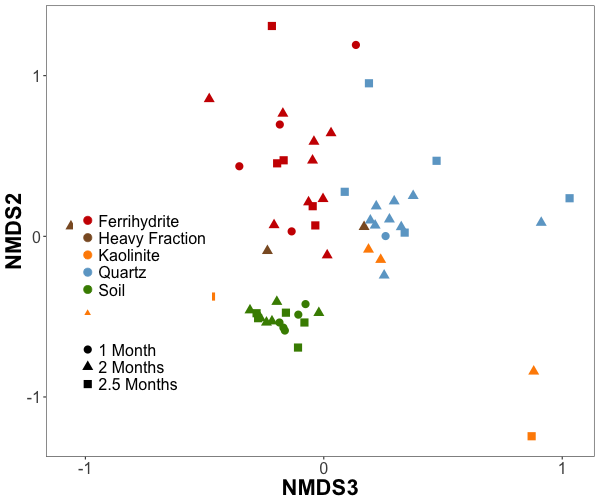

In [15]:
%%R -h 500 -w 600
D <- ord.full
# Sets the relevant ordination

sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(ps_snorm)$Month=as.factor(sample_data(ps_snorm)$Month)
sample_data(ps_snorm)$MonthName=ifelse(sample_data(ps_snorm)$Month==2.0,"1 Month", ifelse(sample_data(ps_snorm)$Month==2.5,"2 Months","2.5 Months"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(ps_snorm, D, color = "Trtmt", shape = "MonthName", axes=c(3,2))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("red3","tan4","darkorange","skyblue3","chartreuse4","gold1"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))

p = p + theme_bw() +
  theme(
      #legend.position = "right",
      legend.justification=c(0,1),
      legend.position=c(0.05,0.6),
      legend.box.just= "left",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

#p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

In [27]:
%%R
ggsave(filename="NMDS-16S-AllMonths.Rachel.jpg", plot=p ,width=6, height=6)

##Making 3D plot

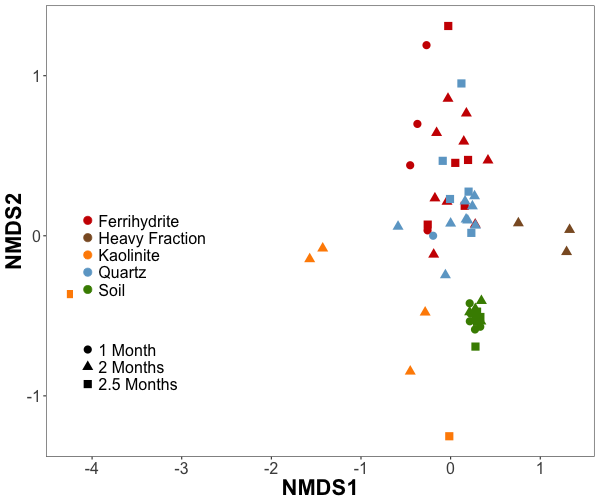

In [88]:
%%R -h 500 -w 600
D <- ord.full
# Sets the relevant ordination

sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(ps_snorm)$Month=as.factor(sample_data(ps_snorm)$Month)
sample_data(ps_snorm)$MonthName=ifelse(sample_data(ps_snorm)$Month==2.0,"1 Month", ifelse(sample_data(ps_snorm)$Month==2.5,"2 Months","2.5 Months"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,

p = plot_ordination(ps_snorm, D, color = "Trtmt", shape = "MonthName", axes=c(1,2,3))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("red3","tan4","darkorange","skyblue3","chartreuse4","gold1"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))

p = p + theme_bw() +
  theme(
      #legend.position = "right",
      legend.justification=c(0,1),
      legend.position=c(0.05,0.6),
      legend.box.just= "left",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

#p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

Error in { : task 367 failed - "Interrupted"
In addition: Warning message:
In UniFrac(physeq, ...) :
  Randomly assigning root as -- 58_179884 -- in the phylogenetic tree in the data you provided.
Square root transformation
Wisconsin double standardization
Run 0 stress 0.09380201 
Run 1 stress 0.09445325 
Run 2 stress 0.09523874 
Run 3 stress 0.09418401 
... procrustes: rmse 0.01205185  max resid 0.06188465 
Run 4 stress 0.09380017 
... New best solution
... procrustes: rmse 0.0002785023  max resid 0.001598697 
*** Solution reached


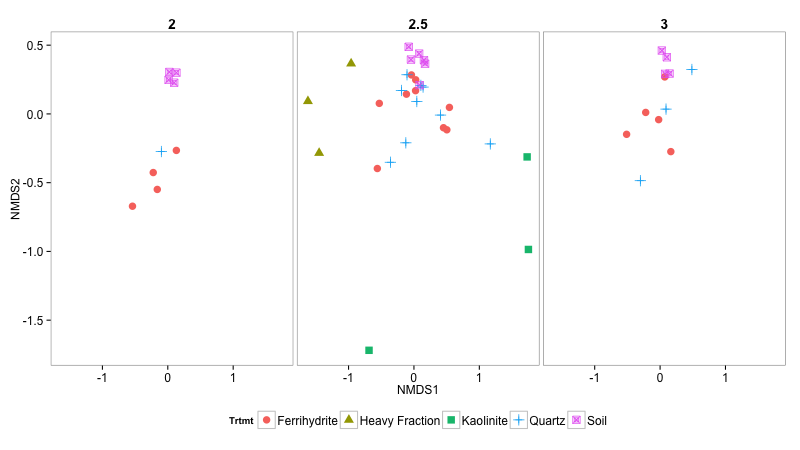

In [19]:
%%R -h 450 -w 800
# Computing the Bray distance matrix and NMDS in parallel

#ps = prune_samples(sample_data(ps_snorm)$Trtmt=="Soil"|sample_data(ps_snorm)$Trtmt=="Ferrihydrite", ps_snorm)

ord.full = ordinate(ps, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=40)
# Consider trymax= and k=3

D <- ord.full
# Sets the relevant ordination

sample_data(ps)$Cosm=as.factor(sample_data(ps)$Cosm)
sample_data(ps)$Month=as.factor(sample_data(ps)$Month)

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(ps, D, color = "Trtmt", shape = "Trtmt", axes=c(1,2))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) 

p = p + guides(color = element_blank(), shape = element_blank())

# Determines the color theme of the plot overall
p = p + theme_bw() +
  theme(
      legend.position = "bottom"
    ,plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
  ) +
  theme(strip.text.x = element_text(size=14, face="bold"),axis.text = element_text(size=12),legend.text = element_text(size=12),
          strip.background = element_rect(colour="white", fill="white"))

p = p + facet_grid(~Month)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

### Checking to make sure that ordination isn't just grouping sample counts

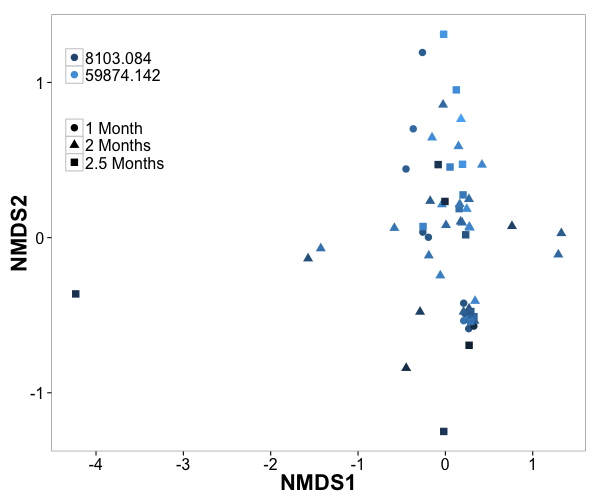

In [22]:
%%R -h 500 -w 600
D <- ord.full
# Sets the relevant ordination

sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(ps_snorm)$Month=as.factor(sample_data(ps_snorm)$Month)
sample_data(ps_snorm)$MonthName=ifelse(sample_data(ps_snorm)$Month==2.0,"1 Month", ifelse(sample_data(ps_snorm)$Month==2.5,"2 Months","2.5 Months"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(ps_snorm, D, color = "Sum", shape = "MonthName", axes=c(1,2))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) #+ scale_colour_manual(values=c("skyblue3","darkorange","chartreuse4","red3","black","gold1"))
p = p + scale_colour_continuous(trans="log")

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))

p = p + theme_bw() +
  theme(
      #legend.position = "right",
      legend.justification=c(0,1),
      legend.position=c(0,1),
      legend.box.just= "left",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

#p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

### Making 3-D plots

In [11]:
%%R
# Computing the Bray distance matrix and NMDS in parallel

#ps_snorm3D = prune_samples(sample_data(ps_snorm)$Month != 2, ps_snorm)
ps_snorm3D = ps_snorm

ord.3D = ordinate(ps_snorm3D, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=40)
# Consider trymax= and k=3

Run 0 stress 0.08807321 
Run 1 stress 0.08644856 
... New best solution
... Procrustes: rmse 0.03796679  max resid 0.2252791 
Run 2 stress 0.088041 
Run 3 stress 0.08817781 
Run 4 stress 0.08817338 
Run 5 stress 0.08800873 
Run 6 stress 0.08646156 
... Procrustes: rmse 0.001241468  max resid 0.006253564 
... Similar to previous best
Run 7 stress 0.08692269 
... Procrustes: rmse 0.0156436  max resid 0.09671375 
Run 8 stress 0.08644852 
... New best solution
... Procrustes: rmse 0.0001664633  max resid 0.0007035046 
... Similar to previous best
Run 9 stress 0.08987357 
Run 10 stress 0.08646305 
... Procrustes: rmse 0.001199993  max resid 0.006068094 
... Similar to previous best
Run 11 stress 0.08645049 
... Procrustes: rmse 0.0008669618  max resid 0.003384964 
... Similar to previous best
Run 12 stress 0.0880012 
Run 13 stress 0.08644616 
... New best solution
... Procrustes: rmse 0.0005571744  max resid 0.002944596 
... Similar to previous best
Run 14 stress 0.08810289 
Run 15 stress 0

In [12]:
%%R
NMDS.coords = data.frame(ord.3D$points)
# Extracting the coordinates from the ordination
NMDS.coords = merge(NMDS.coords,sample_data(ps_snorm3D), by = 0)
# Merging it with the sample data, by rowname (the same)
dim(NMDS.coords)
# Should be able to make 3D plot with this.

[1] 58  8


In [13]:
%%R
#f <- list(family = "Courier New, monospace",size = 18,color = "#7f7f7f")

plot_ly(NMDS.coords, x = NMDS.coords$MDS1, y = NMDS.coords$MDS2, z = NMDS.coords$MDS3, color = NMDS.coords$Trtmt,
        colors = c("red3","tan4","darkorange","skyblue3","chartreuse4")
        #, symbol = NMDS.coords$Month
       )%>%
    layout(scene = list(xaxis = list(title = "NMDS1"), yaxis = list(title = "NMDS2"),
          zaxis = list(title = "NMDS3")))
    


/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: No trace type specified:
  Based on info supplied, a 'scatter3d' trace seems appropriate.
  Read more about this trace type -> https://plot.ly/r/reference/#scatter3d

  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: No scatter3d mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plot.ly/r/reference/#scatter-mode

  warnings.warn(x, RRuntimeWarning)


In [18]:
%%R
Sys.setenv("plotly_username"="TheaWhitman")
Sys.setenv("plotly_api_key"="rufejIoh2s72dGbbCFjo")
plotly_POST(x = last_plot(), filename = "16SNMDS.3D", fileopt = "overwrite", sharing = "public")

RRuntimeError: Error in utils::browseURL(x$url) : 
  'url' must be a non-empty character string


In [17]:
%%R
?plotly_POST

R Help on ‘plotly_POST’plotly_POST               package:plotly               R Documentation

_C_r_e_a_t_e/_M_o_d_i_f_y _p_l_o_t_l_y _g_r_a_p_h_s

_D_e_s_c_r_i_p_t_i_o_n:

     Create and modify graphs on your plotly account via plotly's REST
     API <URL: https://plot.ly/rest/>

_U_s_a_g_e:

     plotly_POST(x = last_plot(), filename = NULL, fileopt = "overwrite",
       sharing = c("public", "private", "secret"))
     
_A_r_g_u_m_e_n_t_s:

       x: either a ggplot object, a plotly object, or a list.

filename: character string describing the name of the plot in your
          plotly account. Use / to specify directories. If a directory
          path does not exist it will be created. If this argument is
          not specified and the title of the plot exists, that will be
          used for the filename.

 fileopt: character string describing whether to create a "new" plotly,
          "overwrite" an existing plotly, "append" data

### Extra analyses for Soil 523 class example

In [43]:
%%R
library("ape")


In [44]:
%%R
tree = read.tree("../../SeqData/fulltree.tre")
ps_snorm = merge_phyloseq(ps_snorm,tree)

In [45]:
%%R
ps_snorm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9190 taxa and 58 samples ]
sample_data() Sample Data:       [ 58 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 9190 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9190 tips and 9188 internal nodes ]


In [63]:
%%R
# Computing the Bray distance matrix and NMDS in parallel

ord.full = ordinate(ps_snorm, method = "NMDS", distance = "unifrac")
# Consider trymax= and k=3

Run 0 stress 0.09627649 
Run 1 stress 0.0989997 
Run 2 stress 0.09600889 
... New best solution
... Procrustes: rmse 0.01139667  max resid 0.05734589 
Run 3 stress 0.09891104 
Run 4 stress 0.09565556 
... New best solution
... Procrustes: rmse 0.005546363  max resid 0.03844867 
Run 5 stress 0.0960706 
... Procrustes: rmse 0.008231062  max resid 0.03841368 
Run 6 stress 0.09920137 
Run 7 stress 0.09627358 
Run 8 stress 0.09910388 
Run 9 stress 0.0991041 
Run 10 stress 0.1215688 
Run 11 stress 0.1205059 
Run 12 stress 0.09920004 
Run 13 stress 0.09601178 
... Procrustes: rmse 0.005722521  max resid 0.03879022 
Run 14 stress 0.09601215 
... Procrustes: rmse 0.005732518  max resid 0.03880746 
Run 15 stress 0.1179118 
Run 16 stress 0.09565605 
... Procrustes: rmse 0.001249299  max resid 0.008033738 
... Similar to previous best
Run 17 stress 0.09920179 
Run 18 stress 0.09910441 
Run 19 stress 0.1199789 
Run 20 stress 0.09910398 
*** Solution reached


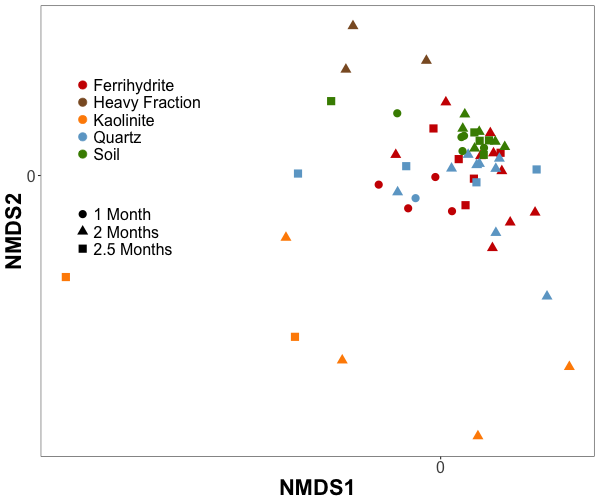

In [64]:
%%R -h 500 -w 600
D <- ord.full
# Sets the relevant ordination

sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(ps_snorm)$Month=as.factor(sample_data(ps_snorm)$Month)
sample_data(ps_snorm)$MonthName=ifelse(sample_data(ps_snorm)$Month==2.0,"1 Month", ifelse(sample_data(ps_snorm)$Month==2.5,"2 Months","2.5 Months"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(ps_snorm, D, color = "Trtmt", shape = "MonthName", axes=c(1,2))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("red3","tan4","darkorange","skyblue3","chartreuse4","gold1"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))

p = p + theme_bw() +
  theme(
      #legend.position = "right",
      legend.justification=c(0,1),
      legend.position=c(0.05,0.9),
      legend.box.just= "left",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

#p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

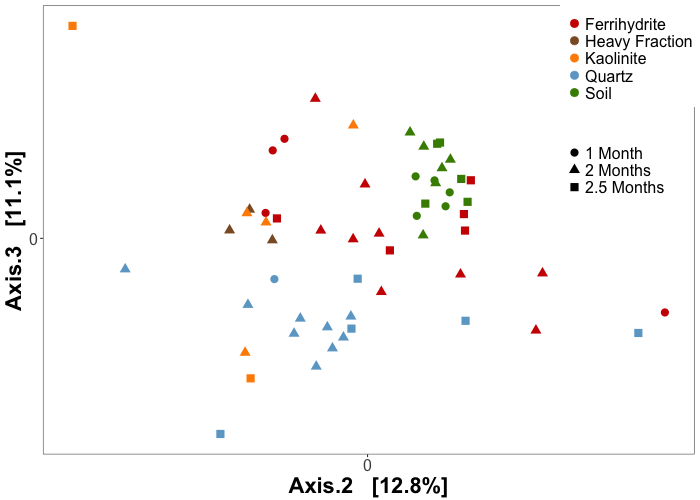

In [52]:
%%R -h 500 -w 700
D <- ord.full
# Sets the relevant ordination

sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(ps_snorm)$Month=as.factor(sample_data(ps_snorm)$Month)
sample_data(ps_snorm)$MonthName=ifelse(sample_data(ps_snorm)$Month==2.0,"1 Month", ifelse(sample_data(ps_snorm)$Month==2.5,"2 Months","2.5 Months"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(ps_snorm, D, color = "Trtmt", shape = "MonthName", axes=c(2,3))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("red3","tan4","darkorange","skyblue3","chartreuse4","gold1"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))

p = p + theme_bw() +
  theme(
      #legend.position = "right",
      #legend.justification=c(0,1),
      legend.position=c(0.9,0.8),
      legend.box.just= "left",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

#p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

In [33]:
%%R
Bray = vegdist(otu_table(ps_snorm),method="bray")

In [34]:
%%R
Bray

            F_2_15    F_2_28    F_2_33     F_2_9  F_2.5_13  F_2.5_14  F_2.5_16
F_2_28   0.6049813                                                            
F_2_33   0.6602824 0.5338689                                                  
F_2_9    0.6917048 0.5642860 0.5514578                                        
F_2.5_13 0.6895488 0.5292623 0.5877396 0.6704967                              
F_2.5_14 0.5837000 0.5860252 0.6220009 0.6488908 0.5173975                    
F_2.5_16 0.4850945 0.5792735 0.6164509 0.5814662 0.6038529 0.4949475          
F_2.5_27 0.6090736 0.5911952 0.6465829 0.6261668 0.5334744 0.4398929 0.4762925
F_2.5_3  0.6743754 0.5789981 0.5940810 0.5149659 0.5857738 0.5193306 0.4637389
F_2.5_30 0.6573042 0.5576037 0.4983217 0.4359808 0.6275869 0.6073453 0.5160162
F_2.5_31 0.6890948 0.6373478 0.5842236 0.4133160 0.7206879 0.6703230 0.5926539
F_2.5_42 0.7748174 0.6502068 0.6870942 0.5903774 0.6487453 0.5921856 0.6403121
F_2.5_49 0.7433221 0.6904869 0.7219854 0.6582303 0.6